# Module 7 - Network Visualization in Python

This notebook shows examples of how to plot networks using `networkx` and `matplotlib` libraries.

In [1]:
import networkx as nx

import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

def draw_graph(graph):

    # extract nodes from graph
    nodes = set([n1 for n1, n2 in graph] + [n2 for n1, n2 in graph])

    # create networkx graph
    G=nx.Graph()

    # add nodes
    for node in nodes:
        G.add_node(node)

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    # draw graph
    pos = nx.shell_layout(G)
    nx.draw(G, pos)

    # show graph
    plt.show()

/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


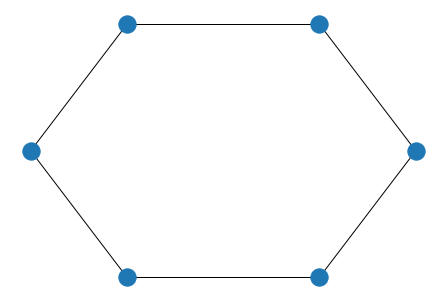

In [2]:
# draw example
graph = [(20, 21),(21, 22),(22, 23), (23, 24),(24, 25), (25, 20)]
draw_graph(graph)

In [3]:
import networkx as nx

import matplotlib.pyplot as plt

def draw_network_graph(graph, labels=None, graph_layout='shell',
               node_size=1600, node_color='blue', node_alpha=0.3,
               node_text_size=14,
               edge_color='blue', edge_alpha=0.3, edge_tickness=1,
               edge_text_pos=0.3,
               text_font='sans-serif'):

    # create networkx graph
    G=nx.Graph()

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    # these are different layouts for the network you may try
    if graph_layout == 'spring':
        graph_pos=nx.spring_layout(G)
    elif graph_layout == 'spectral':
        graph_pos=nx.spectral_layout(G)
    elif graph_layout == 'random':
        graph_pos=nx.random_layout(G)
    else:
        graph_pos=nx.shell_layout(G)

    # draw graph
    nx.draw_networkx_nodes(G,graph_pos,node_size=node_size, 
                           alpha=node_alpha, node_color=node_color)
    nx.draw_networkx_edges(G,graph_pos,width=edge_tickness,
                           alpha=edge_alpha,edge_color=edge_color)
    nx.draw_networkx_labels(G, graph_pos,font_size=node_text_size,
                            font_family=text_font)

    if labels is None:
        labels = range(len(graph))

    edge_labels = dict(zip(graph, labels))
    nx.draw_networkx_edge_labels(G, graph_pos, edge_labels=edge_labels, 
                                 label_pos=edge_text_pos)

    # show graph
    plt.show()

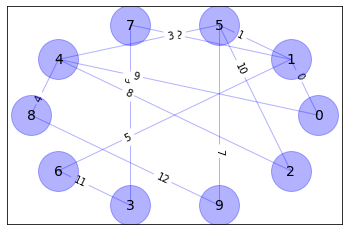

In [4]:
graph_data = [(0, 1), (1, 5), (1, 7), (4, 5), (4, 8), (1, 6), (3, 7), (5, 9),
         (2, 4), (0, 4), (2, 5), (3, 6), (8, 9)]

# you may name your edge labels
labels = map(chr, range(65, 65+len(graph_data)))
#draw_graph(graph, labels)

# if edge labels is not specified, numeric labels (0, 1, 2...) will be used
draw_network_graph(graph_data)

### A Network Plot of Technologies

The data team at StackOverFlow was able to get the relationships between different software technologies using tag correlations. Tags are used by developers at StackOverflow on their Developer Stories: how often technology tags at Stack Overflow appear together relative to how often they appear separately. 

**The data for below plot is obtained from tags from Developer Stories on the StackOverflow online developer community web site.** Data is organized as two tables:

**stack_network_links**: contains links of the network, the source and target tech tags, and the value of the the link between each pair.

**stack_network_nodes**: contains nodes of the network, the name of each node, which group that node belongs to (calculated via a cluster walktrap), and a node size based on how often that technology tag is used.

In [5]:
import warnings
warnings.filterwarnings('ignore')

G = nx.Graph(day="Stackoverflow")
df_nodes = pd.read_csv('/dsa/data/all_datasets/networks_p/stack_network_nodes.csv')
df_edges = pd.read_csv('/dsa/data/all_datasets/networks_p/stack_network_links.csv')

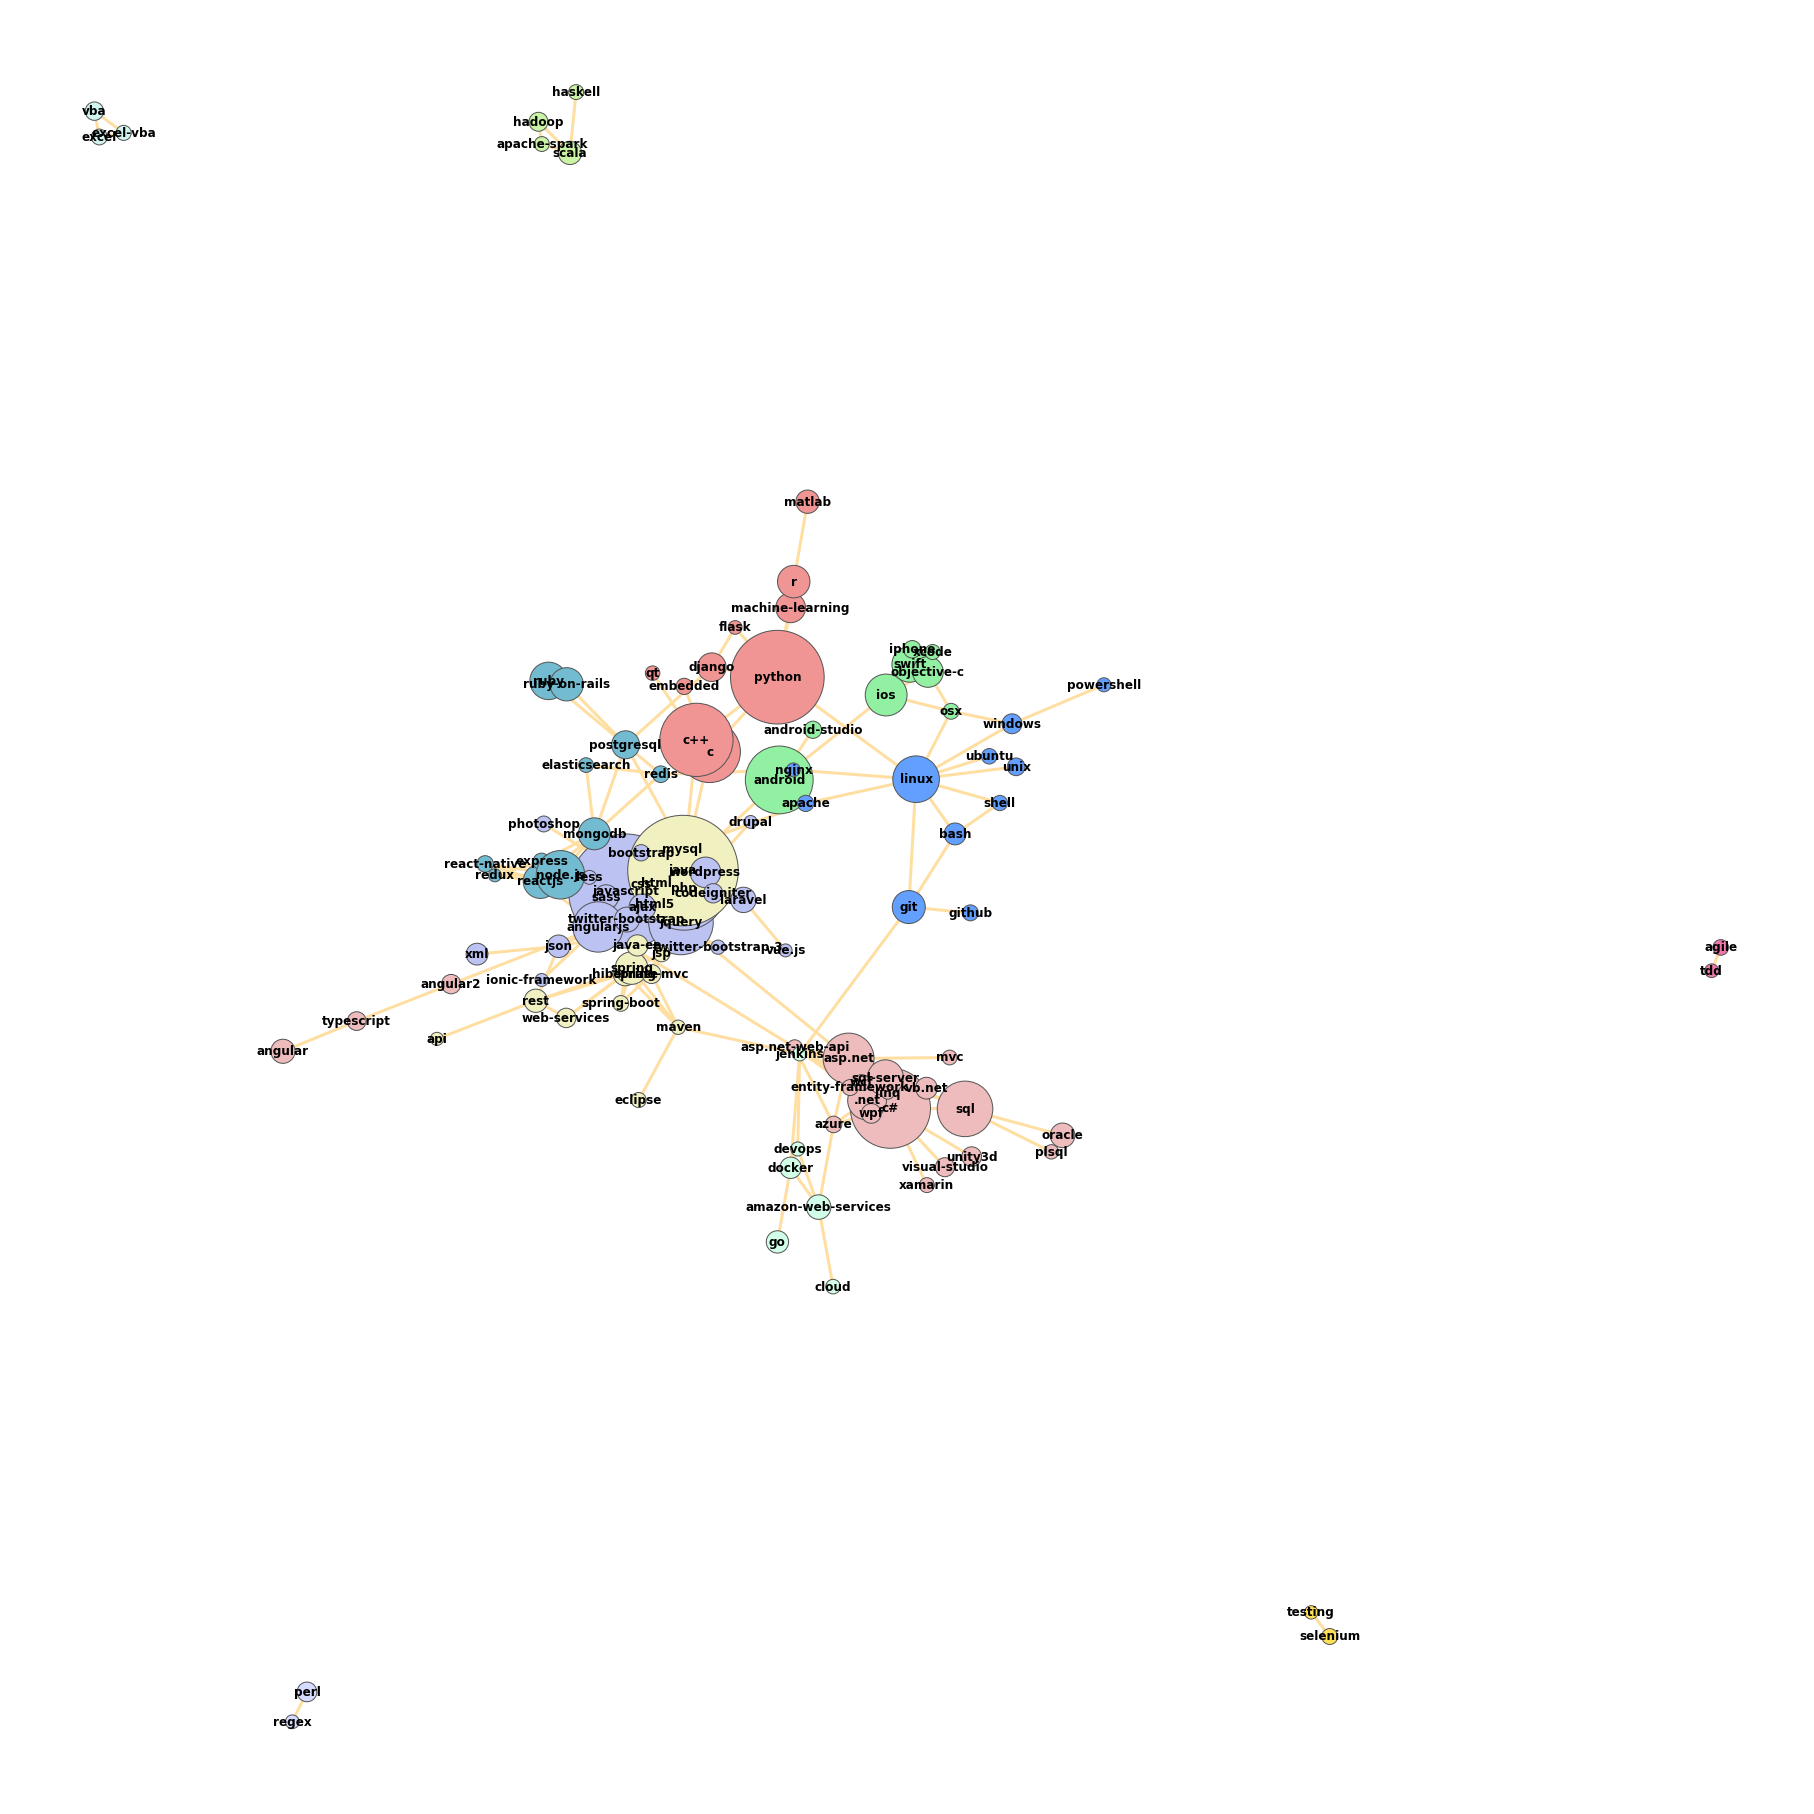

In [6]:
for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['group'], nodesize=2*row['nodesize'])
    
for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])
    
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'} 

plt.figure(figsize=(25,25))
options = {
    'edge_color': '#FFDEA2',
    'width': 3,
    'with_labels': True,
    'font_weight': 'bold',
}
colors = [color_map[G.node[node]['group']] for node in G]
sizes = [G.node[node]['nodesize']*10 for node in G]

"""
Using the spring layout : 
- k controls the distance between the nodes and varies between 0 and 1
- iterations is the number of times simulated annealing is run
default k=0.1 and iterations=50
"""
nx.draw(G, node_color=colors, node_size=sizes, pos=nx.spring_layout(G, k=0.25, iterations=50), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()